<a href="https://colab.research.google.com/github/shurmez01/MAT422/blob/main/LinearAlgebra1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 1.2 Elements of Linear Algebra**




1.2.1: Linear Spaces

In this section we will be covering linear combinations, linear independence, and dimension.

A **linear combination** is a new vector that is being created through a subset by multiplying each vector (quantity that has magnitude and direction) by a constant and then adding those results


In [ ]:
import numpy as np
x = np.array([[0, 1, 1],
              [0, 1, 0],
              [1, 0, 1]])
y = ([0.5, 1.5, 3.5])
scalars = np.linalg.solve(x, y)
scalars

array([ 4.5,  1.5, -1. ])

Here we can see that the vector y=(0.5,1.5,3.5) can be written as a linear combination for the unit vectors (0,1,1), (0,1,0) and (1,0,1)

Now we can take multiple linear combinations, and turn that into a span. The official definition of **span** is  the span(W1,...,Wm) is the set of all linear combinations of Wj's given that W1,...,Wm is an element of V.

**Linear Independence:** A list of vectors (u1, ..., um) is linearly
independent if none of them can be written as a linear combination of the
others.

In [ ]:
x = np.array([1, 2])
y = np.array([2, 4])
z = np.array([5, 6])

def dependence(vector1, vector2):
  matrix = np.stack((vector1, vector2), axis = -1)
  det = np.linalg.det(matrix)
  if det == 0:
    print("the vectors are linearly dependent")
  else:
    print("the vectors are linearly independent")

dependence(x, y)
dependence(x, z)
dependence(y, z)


the vectors are linearly dependent
the vectors are linearly independent
the vectors are linearly independent


This code is a simple way to check the linear dependence or independence of two vectors by using the determinant of a matrix formed by the vectors. We can further this concept into understanding dimensions.

**Basis**: A basis for a vector is a set of linearly independent vectors that can be combined in unique ways to represent any vector in that space

**Dimension**: The dimension of a vector space is the number of vectors or elements in its basis.
- Theorem 1.2.8 (Dimension Theorem) Let U be a linear subspace of V . Any
basis of U always has the same number of elements. All bases of U have the
same length, that is, the same number of elements. We call this number the
dimension of U and denote it dim(U)

**Rank and Nullity**:
Rank- maximum number of linearly independent columns (or rows)
Nullity - dimension of the null space (the solutions to the homogeneous equation Ax = 0).



In [ ]:

v1 = np.array([1, 0])
v2 = np.array([0, 1])
v3 = np.array([2, 2])

vectors = np.array([v1, v2, v3])

rank = np.linalg.matrix_rank(vectors)
dimension = vectors.shape[1]

if rank == dimension:
    print("Vectors are linearly independent.")
else:
    print("Vectors are linearly dependent.")

print("Rank:", rank)
print("Dimension:", dimension)

Vectors are linearly independent.
Rank: 2
Dimension: 2


1.2.2: Orthogonality

Two vectors, A and B, are **orthogonal** if their inner product (dot product) is equal to zero. Mathematically, if A and B are orthogonal, then their inner product A ⋅ B = 0.

**orthonormal** : Basis for a vector space in which the basis vectors are not only linearly independent but also have a length (norm) of 1 and are mutually orthogonal (perpendicular) to each other

**Orthogonal Projection** : Method that finds the closest point on the subspace to a given point

**scalar projection** : scalar projection is given by the dot product of a vector with a unit vector for that direction.

In [ ]:
v = np.array([3, 4])
subspace_vector = np.array([1, 1])

scalar_projection = np.dot(v, subspace_vector) / np.dot(subspace_vector, subspace_vector)
orthogonal_projection = scalar_projection * subspace_vector

print("Given vector:", v)
print("Subspace vector:", subspace_vector)
print("Orthogonal projection:", orthogonal_projection)

Given vector: [3 4]
Subspace vector: [1 1]
Orthogonal projection: [3.5 3.5]


1.2.4: Eigenvalues and Eigenvectors

(Eigenvalues and eigenvectors): Let A ∈ Rd×d be a square matrix. Then λ ∈ R is an eigenvalue of A if there exists a nonzero vector x not equal to 0 such that Ax = λ x.



In [ ]:
matrix = np.array([[0, -1],[1, 0]])

eigenvalues, eigenvectors = np.linalg.eig(matrix)

print("Matrix:", matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Matrix: [[ 0 -1]
 [ 1  0]]
Eigenvalues: [0.+1.j 0.-1.j]
Eigenvectors: [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


Above we can see that this matrix doesn't have linearly independent eigenvectors, because x1, x2 cannot both be 0,
λ must satisfy the equation λ^2 = −1 for which there is no real solution

Theorem 1.2.25 If A is symmetric,then any two eigenvectors from different
eigenspaces are orthogonal

In [ ]:
symmetric_matrix = np.array([[2, -1],[-1, 3]])

eigenvalues, eigenvectors = np.linalg.eig(symmetric_matrix)
normalized_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

print("Symmetric Matrix:", symmetric_matrix)
print("Eigenvalues:", eigenvalues)
print("Normalized Eigenvectors:", normalized_eigenvectors)

dot_product = np.dot(normalized_eigenvectors[:, 0], normalized_eigenvectors[:, 1])
print("Dot Product of Eigenvectors 0 and 1:", dot_product)

Symmetric Matrix:
[[ 2 -1]
 [-1  3]]
Eigenvalues: [1.38196601 3.61803399]
Normalized Eigenvectors:
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]
Dot Product of Eigenvectors 0 and 1: 0.0


Power Method
Iterative method to find the largest Eigenvalue and the corresponding Eigenvector:


In [15]:
import numpy as np
def power_iteration(A, num_iterations):
    n = A.shape[0]
    x = np.random.rand(n)  # Initialize a random vector
    for _ in range(num_iterations):
        x = A @ x  # Apply matrix-vector multiplication
        x = x / np.linalg.norm(x)  # Normalize the vector
    eigenvalue = x @ (A @ x)  # Approximate the largest eigenvalue
    eigenvector = x / np.linalg.norm(x)  # Normalize the eigenvector
    return eigenvalue, eigenvector

# Example usage
A = np.array([[3, 1], [1, 4]])  # Replace this with your matrix
num_iterations = 100  # Number of iterations

largest_eigenvalue, corresponding_eigenvector = power_iteration(A, num_iterations)
print("Largest Eigenvalue:", largest_eigenvalue)
print("Corresponding Eigenvector:", corresponding_eigenvector)



Largest Eigenvalue: 4.618033988749895
Corresponding Eigenvector: [0.52573111 0.85065081]


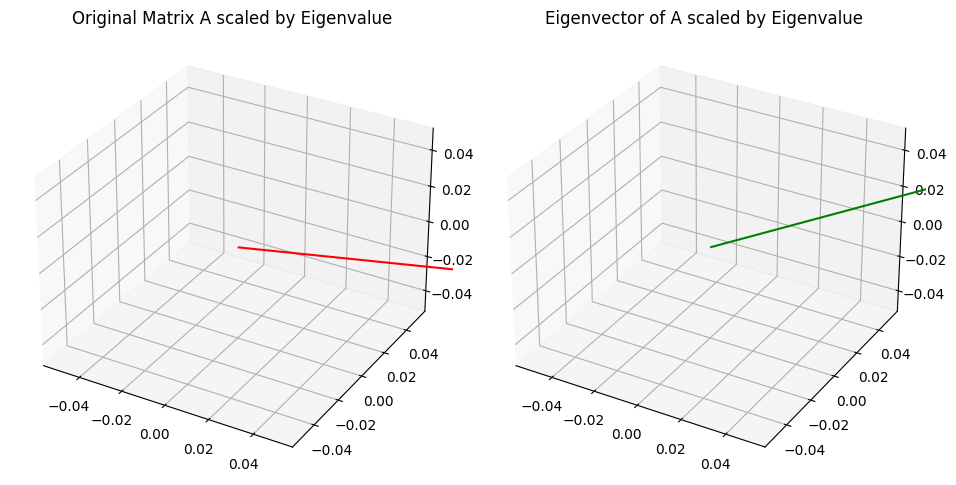

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def power_iteration(A, num_iterations):
    n = A.shape[0]
    x = np.random.rand(n)
    eigenvalue_history = []

    for _ in range(num_iterations):
        x = A @ x
        x = x / np.linalg.norm(x)
        eigenvalue = x @ (A @ x)
        eigenvalue_history.append(eigenvalue)

    eigenvector = x / np.linalg.norm(x)
    return eigenvalue_history, eigenvector


A = np.array([[3, 1], [1, 4]])
num_iterations = 20

eigenvalue_history, corresponding_eigenvector = power_iteration(A, num_iterations)

# 3D Quiver Plot for Original Matrix Scaled by Eigenvalue
fig = plt.figure(figsize=plt.figaspect(0.5))

# Subplot for Original Matrix Scaled by Eigenvalue
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
scaled_matrix = A * eigenvalue_history[-1]
ax1.quiver(0, 0, 0, scaled_matrix[0, 0], scaled_matrix[0, 1], 0,
           length=0.2, normalize=True, color='r')
ax1.set_title('Original Matrix A scaled by Eigenvalue')

# Subplot for Eigenvector Scaled by Eigenvalue
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scaled_eigenvector = corresponding_eigenvector * eigenvalue_history[-1]
ax2.quiver(0, 0, 0, scaled_eigenvector[0], scaled_eigenvector[1], 0,
           length=0.2, normalize=True, color='g')
ax2.set_title('Eigenvector of A scaled by Eigenvalue')

plt.tight_layout()
plt.show()

